In [54]:
def nmf(x,k):
    from sklearn.decomposition import NMF
    nmf = NMF(n_components=k).fit(x)
    w = nmf.fit_transform(x)
    return w

In [55]:
def randomForest():
    #以training data選擇降維維度
    #Random Forest建模
    #最多10棵樹，樹最深10層
    from sklearn.ensemble import RandomForestRegressor
    RF = RandomForestRegressor(n_estimators=10, random_state=1, max_depth=10)
    RF.fit(X_train, y_train)
   
    #以SelectFromModel選擇feature
    from sklearn.feature_selection import SelectFromModel
    SFM = SelectFromModel(RF, prefit=True)
    rf_X_train = SFM.transform(X_train)
    rf_X_test = SFM.transform(X_test)

    #印出所選feature欄位名
    features_list = list(dataset.feature_names)
    feature_select = SFM.get_support()
    print('Feature Selected:')
    for i in range(0,len(features_list)):
        if feature_select[i]:
            print(features_list[i])
            
    #特徵重要性
    importances_list = list(RF.feature_importances_)
    feature_importances = [(feature, round(importance, 2)) 
                           for feature, importance in zip(features_list, importances_list)] 
    #重要性從高到低排序
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

    #印出特徵與重要性
    for pair in feature_importances:
        print('Feature: {:30} Importance: {}'.format(*pair))
        
    #特徵重要性視覺化
    import numpy as np
    import matplotlib.pyplot as plt
    importances = RF.feature_importances_
    #印出所選feature重要性（最高3個）
    #重要性由高到低排序
    indices = np.argsort(importances)[-3:]
    plt.title('Feature Importance')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features_list[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
    
    return rf_X_train,rf_X_test

In [56]:
def pca():
    from sklearn.decomposition import PCA
    import pandas as pd
    from sklearn import preprocessing
    import matplotlib.pyplot as plt
    
    # 把所有的feature都放進去
    # 看保留幾個解釋力進步最多的feature
    print(X_train.shape)
    estimator = PCA(n_components=30)
    pca_X_train = estimator.fit_transform(X_train)
    plt.plot(estimator.explained_variance_ratio_.cumsum(), '--o')
    plt.show()
    
    # 決定降維成4
    # 印出feture相對解釋力每個feature相對原本feature的組成
    # 把test資料也降維
    estimator = PCA(n_components=15)
    pca_X_train = estimator.fit_transform(X_train)
    print(pd.DataFrame(estimator.explained_variance_ratio_))
    plt.plot(estimator.explained_variance_ratio_.cumsum(), '--o')
    plt.show()
    # data_scaled = pd.DataFrame(preprocessing.scale(X_train),columns = X_train.columns) 
    # print(pd.DataFrame(estimator.components_,columns=data_scaled.columns,index = ['feature-1','feature-2','feature-3','feature-4']))
    pca_X_test = estimator.transform(X_test)

    print(pca_X_train.shape)
    print(pca_X_test.shape)
    return pca_X_train,pca_X_test


In [51]:
def svm(X_train, X_test): #count accuracy,precision,recall,F1-measure
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,roc_curve, auc
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    
    print("svm")
    print(X_train.shape)
    print(X_test.shape)
    
    clf = SVC()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    #classfier measures
    print("confusion matrix:")
    print(confusion_matrix(y_test,y_pred))
    print("accurracy:")
    print(accuracy_score(y_test,y_pred))
    print("precision:")
    print(precision_score(y_test, y_pred, average='micro')  )
    print("recall:")
    print(recall_score(y_test, y_pred, average='micro')  )
    print("F1-measure:")
    print(f1_score(y_test, y_pred, average='micro')  )
    #ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    fig = plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
#     return accuracy_score(y_test,y_pred)

In [52]:
def svm_iterative(X_train, X_test): #just for NMF
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
    clf = SVC()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    return f1_score(y_test,y_pred)

===Non-reduction===
svm
(381, 30)
(188, 30)
confusion matrix:
[[  0  67]
 [  0 121]]
accurracy:
0.6436170212765957
precision:
0.6436170212765957
recall:
0.6436170212765957
F1-measure:
0.6436170212765957


/Users/hosi/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


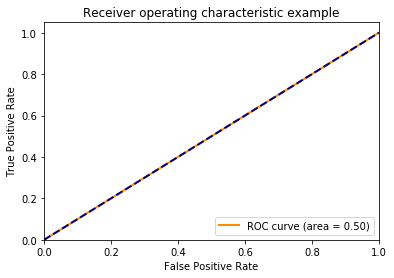

===NMF reduction===


/Users/hosi/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/hosi/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/hosi/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/hosi/anaconda3/lib/python3.6/site-packages/sklearn/

/Users/hosi/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/hosi/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/hosi/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/hosi/anaconda3/lib/python3.6/site-packages/sklearn/

svm
(381, 15)
(188, 15)
confusion matrix:
[[ 67   0]
 [  6 115]]
accurracy:
0.9680851063829787
precision:
0.9680851063829787
recall:
0.9680851063829787
F1-measure:
0.9680851063829787


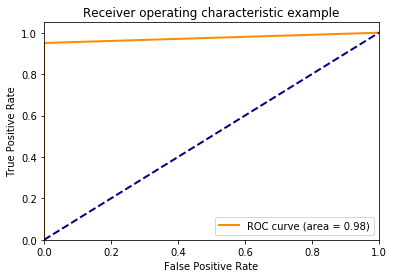

===Random Forest reduction===
Feature Selected:
mean concave points
worst radius
worst concave points
Feature: mean concave points            Importance: 0.45
Feature: worst concave points           Importance: 0.3
Feature: worst radius                   Importance: 0.05
Feature: worst concavity                Importance: 0.03
Feature: mean texture                   Importance: 0.02
Feature: area error                     Importance: 0.02
Feature: concavity error                Importance: 0.02
Feature: worst texture                  Importance: 0.02
Feature: worst perimeter                Importance: 0.02
Feature: worst area                     Importance: 0.02
Feature: mean fractal dimension         Importance: 0.01
Feature: radius error                   Importance: 0.01
Feature: smoothness error               Importance: 0.01
Feature: worst smoothness               Importance: 0.01
Feature: mean radius                    Importance: 0.0
Feature: mean perimeter                 Impor

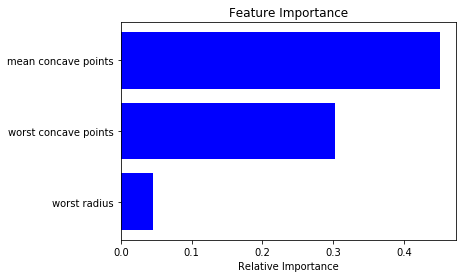

svm
(381, 3)
(188, 3)
confusion matrix:
[[ 59   8]
 [  1 120]]
accurracy:
0.9521276595744681
precision:
0.9521276595744681
recall:
0.9521276595744681
F1-measure:
0.9521276595744681


/Users/hosi/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


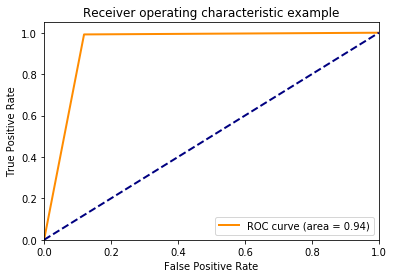

===PCA reduction===
(381, 30)


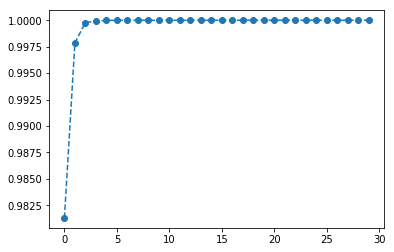

               0
0   9.812975e-01
1   1.656650e-02
2   1.921710e-03
3   1.244997e-04
4   7.869867e-05
5   5.911149e-06
6   3.773446e-06
7   8.183376e-07
8   3.667756e-07
9   1.528938e-07
10  6.253274e-08
11  1.379651e-08
12  6.803270e-09
13  4.352836e-09
14  2.844384e-09


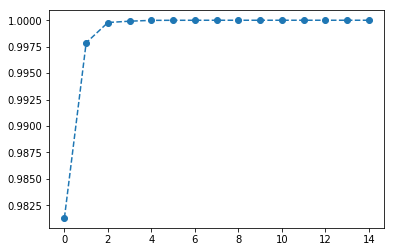

(381, 15)
(188, 15)
after
(381, 15)
(188, 15)
svm
(381, 15)
(188, 15)
confusion matrix:
[[  0  67]
 [  0 121]]
accurracy:
0.6436170212765957
precision:
0.6436170212765957
recall:
0.6436170212765957
F1-measure:
0.6436170212765957


/Users/hosi/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


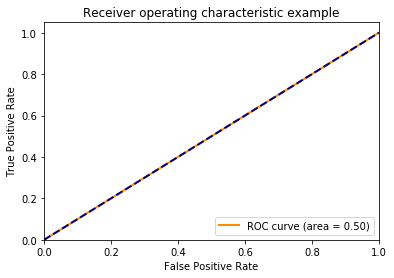

In [60]:
#main
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

#read data and split data into train and test data (2:1)
dataset = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'], 
                                                    test_size=0.33, random_state=42)
#non-reduction
print("===Non-reduction===")
svm(X_train,X_test)
#NMF reduction: find max accuracy in which reduced dimensions, and choose this dimension
print("===NMF reduction===")
accList = np.zeros(len(X_train[0]))
for k in range(len(X_train[0])):
    nmf_X_train = nmf(X_train, k+1)
    nmf_X_test = nmf(X_test, k+1)
    accList[k] = svm_iterative(nmf_X_train, nmf_X_test)
#     print(accList[k])
k_opt = np.argmax(accList)+1

nmf_X_train = nmf(X_train, k_opt)
nmf_X_test = nmf(X_test, k_opt)
# print(k_opt)
svm(nmf_X_train,nmf_X_test)
#Random Forest reduction
print("===Random Forest reduction===")
rf_X_train,rf_X_test = randomForest()
svm(rf_X_train,rf_X_test)
#PCA reduction
print("===PCA reduction===")
pca_X_train,pca_X_test = pca()
print("after")
print(pca_X_train.shape)
print(pca_X_test.shape)
svm(pca_X_train,pca_X_test)